# 머신러닝 분류

### 1. 손글씨 분류

1)데이터 준비

2)데이터 설정

Feature Data 지정
Label Data 지정
Target Names 지정
데이터 설명해보기

3)훈련, 테스트 셋 분리

4)각 머신러닝 모델 적용

Decision Tree
Random Forest
SVM
SGD Classifier
Logistic Regression

5)모델 평가

### 2. 와인 분류
1)데이터 준비

2)데이터 설정

Feature Data 지정
Label Data 지정
Target Names 지정
데이터 설명해보기

3)훈련, 테스트 셋 분리

4)각 머신러닝 모델 적용

Decision Tree
Random Forest
SVM
SGD Classifier
Logistic Regression

5)모델 평가

### 3. 유방암 분류
1)데이터 준비

2)데이터 설정

Feature Data 지정
Label Data 지정
Target Names 지정
데이터 설명해보기

3)훈련, 테스트 셋 분리

4)각 머신러닝 모델 적용

Decision Tree
Random Forest
SVM
SGD Classifier
Logistic Regression

5)모델 평가





### 1.손글씨 분류



## 1)데이터 준비

In [146]:
# 0.필요한 패키지 불러오기
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
# 1)데이터 설정
hand_digits = load_digits()

print(type(dir(hand_digits))) 
print(len(hand_digits))
print(hand_digits.keys())
print(hand_digits.feature_names)

<class 'list'>
7
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [148]:
hand_digits_data = hand_digits.data
print(hand_digits_data.shape)

hand_digits_feature_names = hand_digits.feature_names
print(hand_digits_feature_names)

(1797, 64)
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


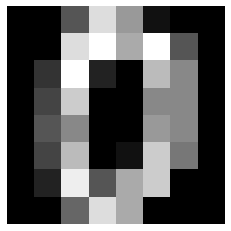

In [149]:
plt.imshow(hand_digits_data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

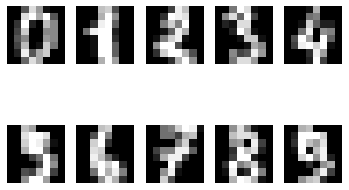

In [150]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(hand_digits_data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [151]:
hand_digits_label = hand_digits.target
print(hand_digits_label.shape)
hand_digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [152]:
hand_digits_df = pd.DataFrame(data=hand_digits_data, columns=hand_digits.feature_names)
hand_digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [153]:
hand_digits_df["label"] = hand_digits.target
hand_digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [154]:
X_train_dig, X_test_dig, y_train_dig, y_test_dig = train_test_split(hand_digits_data, 
                                                    hand_digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train_dig), ', X_test 개수: ', len(X_test_dig))

X_train 개수:  1437 , X_test 개수:  360


## 1) Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)
decision_tree.fit(X_train_dig, y_train_dig)

classifier


DecisionTreeClassifier(random_state=32)

In [156]:
y_pred_dig_dt = decision_tree.predict(X_test_dig)
y_pred_dig_dt

array([6, 0, 5, 3, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 3, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 5, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 2, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 2, 7,
       7, 2, 2, 4, 5, 5, 4, 6, 2, 0, 3, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 4,
       3, 7, 6, 3, 1, 5, 6, 2, 1, 0, 1, 1, 4, 5, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 9, 0, 9, 3, 1, 2, 2,
       3, 6, 9, 4, 0, 1, 8, 3, 9, 1, 0, 8, 5, 0, 7, 2, 7, 4, 4, 9, 2, 2,
       6, 0, 4, 4, 9, 5, 0, 2, 4, 4, 2, 2, 3, 7, 2, 9, 0, 3, 5, 9, 9, 6,
       8, 4, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 8, 1, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 1, 7, 1, 1, 9, 8, 5, 5, 3, 6, 6, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 6, 4, 7, 9, 5, 3, 6, 2, 5, 2, 5, 9, 3, 9, 9,
       2, 2, 1, 6, 4, 1, 7, 5, 9, 8, 9, 5, 7, 4, 3, 7, 4, 8, 2, 8, 9, 5,
       3, 2, 1, 0, 4, 2, 1, 0, 1, 4, 1, 7, 6, 4, 7, 7, 9, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 2, 1, 1, 0, 2,

In [157]:
y_test_dig

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [158]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_dig, y_pred_dig_dt)
accuracy

0.8555555555555555

In [159]:
print(classification_report(y_test_dig, y_pred_dig_dt))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



## 2) Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train_dig, y_train_dig)
y_pred_dig_rf = random_forest.predict(X_test_dig)

print(classification_report(y_test_dig, y_pred_dig_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



## 3) SVM

In [161]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [162]:
svm_model.fit(X_train_dig, y_train_dig)
y_pred_dig_svm = svm_model.predict(X_test_dig)

print(classification_report(y_test_dig, y_pred_dig_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## 4) SGD

In [163]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [164]:
sgd_model.fit(X_train_dig, y_train_dig)
y_pred_dig_sgd = sgd_model.predict(X_test_dig)

print(classification_report(y_test_dig, y_pred_dig_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.86      0.90      0.88        42
           2       0.98      1.00      0.99        40
           3       0.94      0.88      0.91        34
           4       1.00      0.97      0.99        37
           5       0.90      1.00      0.95        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.89      0.91      0.90        43
           9       0.97      0.88      0.92        32

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



## 5) Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [166]:
logistic_model.fit(X_train_dig, y_train_dig)
y_pred_dig_lr = logistic_model.predict(X_test_dig)

print(classification_report(y_test_dig, y_pred_dig_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 손글씨 분류 평가

손글씨는 정확하게 맞추는 것이 중요하기 때문에 평가지표는 precision 으로 하겠습니다.
각 분류모델 별 precision 은 각각 아래와 같습니다.

1.decision tree : 0.86
2.random forest : 0.96
3.svm : 0.99
4.sgd : 0.95
5.logistic regression : 0.95

SVM 의 성능이 가장 좋은 것으로 평가할 수 있겠습니다.

# 2. 와인 분류

In [167]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [168]:
wine = load_wine()

wine_data = wine.data
wine_label = wine.target

In [169]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

## 1) Decision Tree

In [170]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train_wine, y_train_wine)
y_pred_wine_dt = decision_tree.predict(X_test_wine)

print(classification_report(y_test_wine, y_pred_wine_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



## 2) Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

random_forest_wine = RandomForestClassifier(random_state=32)
random_forest_wine.fit(X_train_wine, y_train_wine)
y_pred_wine_rf = random_forest_wine.predict(X_test_wine)

print(classification_report(y_test_wine, y_pred_wine_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 3) SVM

In [172]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [173]:
svm_model.fit(X_train_wine, y_train_wine)
y_pred_wine_svm = svm_model.predict(X_test_wine)

print(classification_report(y_test_wine, y_pred_wine_svm))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



## 4) SGD

In [190]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [192]:
sgd_model.fit(X_train_wine, y_train_wine)
y_pred_wine_sgd = sgd_model.predict(X_test_wine)

print(classification_report(y_test_wine, y_pred_wine_sgd))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.00      0.00      0.00        17
           2       0.29      0.50      0.36        12

    accuracy                           0.36        36
   macro avg       0.25      0.50      0.33        36
weighted avg       0.19      0.36      0.24        36



/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5) Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [177]:
logistic_model.fit(X_train_wine, y_train_wine)
y_pred_wine_lr = logistic_model.predict(X_test_wine)

print(classification_report(y_test_wine, y_pred_wine_lr))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 와인 분류 평가

와인분류는 precision, recall 모두 중요하기 때문에
f1-score 로 평가지표를 하겠습니다.
각 분류모델 별 f1-score 은 각각 아래와 같습니다.

1.decision tree: 0.95
2.random forest : 1.00
3.svm : 0.56
4.sgd : 0.36
5.logistic regression : 0.96

Random Forest 의 성능이 가장 좋은 것으로 평가할 수 있겠습니다.

# 3. 유방암 분류

In [178]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [179]:
breast_cancer = load_breast_cancer()

breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [180]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

## 1) Decision Tree

In [181]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train_bc, y_train_bc)
y_pred_bc = decision_tree.predict(X_test_bc)

print(classification_report(y_test_bc, y_pred_bc))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



## 2) Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)

In [183]:
random_forest.fit(X_train_bc, y_train_bc)
y_pred_bc_rf = random_forest.predict(X_test_bc)

print(classification_report(y_test_bc, y_pred_bc_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



## 3) SVM

In [184]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [185]:
svm_model.fit(X_train_bc, y_train_bc)
y_pred_bc_svm = svm_model.predict(X_test_bc)

print(classification_report(y_test_bc, y_pred_bc_svm))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



## 4) SGD

In [186]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [187]:
sgd_model.fit(X_train_bc, y_train_bc)
y_pred_bc_sgd = sgd_model.predict(X_test_bc)

print(classification_report(y_test_bc, y_pred_bc_sgd))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



## 5) Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [189]:
logistic_model.fit(X_train_bc, y_train_bc)
y_pred_bc_lr = logistic_model.predict(X_test_bc)

print(classification_report(y_test_bc, y_pred_bc_lr))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 유방암 분류 평가

유방암은 양성을 놓치면 안 되기 때문에, Recall 로 평가지표를 하겠습니다.
각 분류모델 별 Recall 은 각각 아래와 같습니다.

1.decision tree: 0.89
2.random forest : 1.00
3.svm : 0.86
4.sgd : 0.86
5.logistic regression : 0.93

Random Forest 의 성능이 가장 좋은 것으로 평가할 수 있겠습니다.

## 결론

1.DecisionTree 와 Random Forest 중에서는 Random Forest 의 성능이 항상 더 좋다.
2.전체적으로 Random Forest 성능이 상대적으로 높다.
3.이미지 분류로는 SVM 의 성능이 뛰어나다

### 느낀점

1.데이터 정리만 잘 해놓으면, 머신러닝 모델분류는 몇 줄 되지도 않는 코드로 좋은 성능을 발휘할 수 있다는 것을 느낀 귀중한 경험이었습니다.

2.데이터마다 다른 평가기준을 정해야한다는 것을 느낀 시간이었습니다.